## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
pd.options.mode.chained_assignment = None
import re

ModuleNotFoundError: No module named 'numpy'

## Downloading the dataset

In [3]:
url = "../data_preprocess/test.csv"
df_test = pd.read_csv(url)
df_test

Unnamed: 0             tweet_id sentiment  \
0             0  1213842050455654402   neutral   
1             1  1215480766295171072   neutral   
2             2  1222950264812064768  positive   
3             3  1213967203076395009  negative   
4             4  1213961696840171521   neutral   
..          ...                  ...       ...   
934         934  1214922390469324802   neutral   
935         935  1214922390469324802   neutral   
936         936  1223053757883260928  positive   
937         937  1213771045070659584  negative   
938         938  1213245927508598786   neutral   

                                                 tweet  
0           @Haymana_ እንደዛ ካልሆነ በስተቀር ሰውዬው ማንንም አይቦልኩም  
1                                                  NaN  
2    ለመገናኛ ብዙሃን አባላት!\n\nበደምቢዶሎ የታገቱ ኢትዮጵያውያን ድምፅ ለ...  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
934  @degu_zerihun የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማ...  
935  @degu_zerihun የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማ...  
936  "አዲሱ መንግስት"ና ህገ-መንግስታዊነት - ረዥም ገመድ\n\nህገ-መንግስታ...  
937  @TeameYitbarek @Ze_Astegoma @eskinder_nega ትግሬ...  
938     @heyab_ @Antesho19 @awushwish እኔም ልክ እንዳንተው ነኝ  

[939 rows x 4 columns]

In [4]:
url = "../data_preprocess/train.csv"
df_train = pd.read_csv(url)
df_train

Unnamed: 0             tweet_id sentiment  \
0              0  1213084822521950209   neutral   
1              1  1213011490372038656   neutral   
2              2  1213763702715043840     mixed   
3              3  1213764224356421633   neutral   
4              4  1212766574337150976  positive   
...          ...                  ...       ...   
7506        7506  1212925000610721792   neutral   
7507        7507  1201475433780219904  negative   
7508        7508  1212741943412822016  positive   
7509        7509  1213033524766351360  negative   
7510        7510  1215926705887547392     mixed   

                                                  tweet  
0                                                   NaN  
1         ልዩ የተፈጥሮ ገፅታ \n *****\n\nየምስራቅ አፍሪካ የውሃ ማማ ጮቄ  
2     @AbbaSheger ማንም ቢሆን የሀገሩን ጥቅም አሳልፎ አይሰጥም። ያ መላ...  
3     ብ/ጄ አሳምነው ጽጌ ከምክትል ጠ/ሚ ደመቀ ጋር በሱዳን ጉብኝት አልበሽር ...  
4                                                   NaN  
...                                                 ...  
7506               ሙስናውና የመልካም አስተዳዳር እጦቱ በእጅጉ እጨመረ ነው።  
7507  የብልጽግናን ፓርቲ ፊርማ ከፈረሙት መካከል የኦርቶዶክስ ተዋህዶ አማኞች የ...  
7508  1ኛ የጴጥሮስ መልእክት-1 Peter :1\n 23 ዳግመኛ የተወለዳችሁት ከ...  
7509  @ChobinaAtlas @hymelee @AbbaSheger ማነን: ስንት በር...  
7510  ታናሽ ወንድሜ Abrham የመጀመርያውን አዲስ  ነጠላ ዜማ ይዞ እየመጣ ነ...  

[7511 rows x 4 columns]

In [5]:
url = "../data_preprocess/dev.csv"
df_valid = pd.read_csv(url)
df_valid

Unnamed: 0             tweet_id sentiment  \
0             0  1214005466675777536   neutral   
1             1  1213261378397409280     mixed   
2             2  1213846984349626369   neutral   
3             3  1216365312561635333  positive   
4             4  1213234381768265728   neutral   
..          ...                  ...       ...   
934         934  1214096434989031425  positive   
935         935  1213850051866324998  negative   
936         936  1214678524746981383  positive   
937         937  1213120677743599618  positive   
938         938  1214758637433962496   neutral   

                                                 tweet  
0    RT @AyeleGelan: ድሮ ተሸምድደው በቀላሉ ይንበለበሉ የነበሩ ኢህኣ...  
1    ኦሮሞ ልምድ የለውም ካልን ሌላውም ያው ይሆናል ዋናውነገር ፍትህን ማውረድ...  
2    እስክንድር ነጋ ባለአደራው ምክርቤት ለአንድ ብሄር እና ለአንድ ሃይማኖት ...  
3    @Gfasil በረከት በላይነህ \nየእያዪ ፈንገስ ትያትር ደራሲ\nእንዲሁም...  
4                                                  NaN  
..                                                 ...  
934  @HaileFida ምሳሌ 11 (Proverbs)\n2፤ ትዕቢት ከመጣች ውርደ...  
935  @isuchisu በተንኮል በጠባብ ዘረኝነት  የተመረዘውን ልብህን አፅዳ ከ...  
936  @noctivwgus ሀሳቡ እርስዎን ለማስጨነቅ አልነበረም, በእውነቱ። እኔ...  
937  @_wurye @_wurye ❤ I'm inlove with this song 🎵\...  
938  @HussenMuhye ህዝብ በእብደት ያቃጠለው እንደተወገዘ ቢሆንም ወዲያው...  

[939 rows x 4 columns]

## Data Pre-Processing and Cleaning

In [6]:
# drop "mixed" sentiment from df train and df_test
df_train = df_train[df_train["sentiment"].str.contains("mixed")==False]
df_test = df_test[df_test["sentiment"].str.contains("mixed")==False]

In [7]:
def clean_df(df):
  """removes null values and resets index"""
  # remove null values from dataset
  df = df.dropna()
  #drop repeated rows (drop rows with similar tweet id)
  df = df.drop_duplicates(subset='tweet_id', keep="first")
  df = df.reset_index(drop=True)
  return df

df_test = clean_df(df_test)
df_train = clean_df(df_train)
df_valid = clean_df(df_valid)

In [8]:
def clean_text(row, options):
    """Removes url, mentions, emoji and uppercase from tweets"""
    if options['lowercase']:
        row = row.lower()

    if options['remove_url']:
        row = re.sub(r"(?:\@|https?\://)\S+", "", row)

    if options['remove_mentions']:
        row = re.sub("@[A-Za-z0-9_]+","", row)

    if options['demojify']:
      emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
      row = re.sub(emoj, '', row)

    return row

clean_config = {
    'remove_url': True,
    'remove_mentions': True,
    'lowercase': True,
    'demojify': True
    }

df_test['tweet'] = df_test['tweet'].apply(clean_text, args=(clean_config,))
df_train['tweet'] = df_train['tweet'].apply(clean_text, args=(clean_config,))
df_valid['tweet'] = df_valid['tweet'].apply(clean_text, args=(clean_config,))

In [9]:
df_train['tweet']

0           ልዩ የተፈጥሮ ገፅታ \n *****\n\nየምስራቅ አፍሪካ የውሃ ማማ ጮቄ
1       ብ/ጄ አሳምነው ጽጌ ከምክትል ጠ/ሚ ደመቀ ጋር በሱዳን ጉብኝት አልበሽር ...
2        the only part i like......"ትልልቅ የነዳጅ ፍጆታ ያላቸው...
3           እሺ ወንድሜ እተከላለሁ ማኛ እኮ ናት ወዳታለሁ በጣም ደሞ  ቅና አሉህ 
4        ይቺን አውቆ ነው ዶ/ር አብይ ክርስቲያን የሆነዋ.......ኧረ ጀንፈሉ ...
                              ...                        
5759      እኔም እንዳዛው ነገር ነኝ ግን የኢትዮጵያ ብልጽግና ፓርቲ መሆን ነበረ...
5760                 ሙስናውና የመልካም አስተዳዳር እጦቱ በእጅጉ እጨመረ ነው።
5761    የብልጽግናን ፓርቲ ፊርማ ከፈረሙት መካከል የኦርቶዶክስ ተዋህዶ አማኞች የ...
5762    1ኛ የጴጥሮስ መልእክት-1 peter :1\n 23 ዳግመኛ የተወለዳችሁት ከ...
5763       ማነን: ስንት በርሀብ እየሞተ ባለባት ሀገር ስለ ጦርነት የምናወራው:...
Name: tweet, Length: 5764, dtype: object

In [ ]:
df_valid

Unnamed: 0  ...                                              tweet
0             0  ...  rt  ድሮ ተሸምድደው በቀላሉ ይንበለበሉ የነበሩ ኢህኣዴግ ልብ ወለድ ድር...
1             1  ...  ኦሮሞ ልምድ የለውም ካልን ሌላውም ያው ይሆናል ዋናውነገር ፍትህን ማውረድ...
2             2  ...  እስክንድር ነጋ ባለአደራው ምክርቤት ለአንድ ብሄር እና ለአንድ ሃይማኖት ...
3             3  ...   በረከት በላይነህ \nየእያዪ ፈንገስ ትያትር ደራሲ\nእንዲሁም ገራሚ ገጣ...
4             5  ...      የአብይ ተላላኪና ጉዳይ አስፈፃሚ እንዳይሆን እንጂ ሌላዉስ ችግር የለዉም
..          ...  ...                                                ...
797         934  ...   ምሳሌ 11 (proverbs)\n2፤ ትዕቢት ከመጣች ውርደት ትመጣለች፤ በ...
798         935  ...   በተንኮል በጠባብ ዘረኝነት  የተመረዘውን ልብህን አፅዳ ከዚያ ለአላህ ስ...
799         936  ...   ሀሳቡ እርስዎን ለማስጨነቅ አልነበረም, በእውነቱ። እኔን እንደማታጠቃኝ ...
800         937  ...     i'm inlove with this song \nያንተ ፊት ተከብሎኛል እ...
801         938  ...   ህዝብ በእብደት ያቃጠለው እንደተወገዘ ቢሆንም ወዲያው ምላሽ አግኝቷል።የ...

[802 rows x 4 columns]

## Character level normalization

In [28]:
#character level normalization

import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48

In [29]:
df_test['tweet'] = df_test['tweet'].apply(lambda x: normalize_char_level_missmatch(x))
df_train['tweet'] = df_train['tweet'].apply(lambda x: normalize_char_level_missmatch(x))
df_valid['tweet'] = df_valid['tweet'].apply(lambda x: normalize_char_level_missmatch(x))

# Model 1: Using Naive Bayes model and count vectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import sys

In [31]:
# put values of tweet and label in variables
X_train, y_train = df_train['tweet'].values, df_train['sentiment'].values
X_test, y_test = df_test['tweet'].values, df_test['sentiment'].values

In [32]:
df_train.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [33]:
#change text to vector using count vectorizer and scale

matrix = CountVectorizer(analyzer='word',max_features=1000, ngram_range=(1, 3))
X_train.shape
X_train = matrix.fit_transform(X_train).toarray() #scaling
X_test = matrix.fit_transform(X_test).toarray()
np.set_printoptions(threshold=sys.maxsize)

for i in range(2):
  print(X_train[i])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Initialize and train the model

In [34]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

## Predict using the test file

In [35]:
# Predict Class
y_pred = classifier.predict(X_test)

## Meause accuracy

In [36]:
# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.32751937984496127

A very low accuracy of 21.7% at first but when Mixed sentiment was removed, accuracy increased to 32.75%

###Classification report and confusion matrix

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['neutral', 'negative', 'positive']))

              precision    recall  f1-score   support

     neutral       0.31      0.36      0.34       144
    negative       0.47      0.29      0.36       251
    positive       0.23      0.37      0.28       121

    accuracy                           0.33       516
   macro avg       0.34      0.34      0.32       516
weighted avg       0.37      0.33      0.33       516



# Model 2: Naive Bayes model with TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# put values of tweet and label in variables
X_train, y_train = df_train['tweet'].values, df_train['sentiment'].values
X_test, y_test = df_test['tweet'].values, df_test['sentiment'].values

## Scale the data

In [ ]:
matrix = TfidfVectorizer(analyzer='word',max_features=1000, ngram_range=(1, 3))
X_train = matrix.fit_transform(X_train).toarray() #scaling
X_test = matrix.fit_transform(X_test).toarray()
np.set_printoptions(threshold=sys.maxsize)

##  Initialize and train the model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Make a prediction

In [ ]:
y_pred = classifier.predict(X_test)

## Calculate the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.31007751937984496

Had a very low accuracy of 21.5% but it increased to 31% once "mixed" sentiments were removed.

# Base class for Model 3, 4 & 5

In [ ]:
class Base:
    """Base class that houses common utilities for reading in test data
    and calculating model accuracy and F1 scores.
    """
    def __init__(self) -> None:
        pass

    def read_data(self, fname: str, lower_case: bool=False,
                  colnames=['truth', 'text']) -> pd.DataFrame:
        "Read in test data into a Pandas DataFrame"
        df = pd.read_csv(fname, sep='\t', header=None, names=colnames)
        df['truth'] = df['truth'].str.replace('__label__', '')
        # Categorical data type for truth labels
        df['truth'] = df['truth'].astype(int).astype('category')

        # Optional lowercase for test data (if model was trained on lowercased text)
        if lower_case:
            df['text'] = df['text'].str.lower()
        return df

    def accuracy(self, df: pd.DataFrame) -> None:
        "Prediction accuracy (percentage) and F1 score"

        acc = accuracy_score(df['sentiment'], df['pred'])*100
        f1 = f1_score(df['sentiment'], df['pred'], average='macro')*100

        recall = recall_score(df['sentiment'], df['pred'], average='macro')*100
        precision = precision_score(df['sentiment'], df['pred'], average='macro')*100
        newf1 = 2 * recall * precision / (recall + precision)

        df.to_csv("result.csv",index = False)

        print(len(df))
        print(
            "Accuracy: {:.3f}\nMacro F1-score: {:.3f}\nMacro recall: {:.3f}\nMacro precission: {:.3f}\nNew F1 MAcro: {:.3f}".format(
                acc, f1, recall, precision, newf1))
        print("{:.2f} & {:.2f} & {:.2f} & {:.2f}".format(acc, recall, precision, newf1))

# Model 3: Text blob sentiment

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [ ]:
class TextBlobSentiment(Base):
    """Predict sentiment scores using TextBlob.
    https://textblob.readthedocs.io/en/dev/
    """
    def __init__(self, model_file: str=None) -> None:
        super().__init__()

    def score(self, text: str) -> float:
        # pip install textblob
        from textblob import TextBlob
        return TextBlob(text).sentiment.polarity

    def predict(self, df_train, df_test, lower_case: bool) -> pd.DataFrame:
        df_test['score'] = df_test['tweet'].apply(self.score)
        # Convert float score to category based on binning
        df_test['pred'] = pd.cut(df_test['score'],
                            bins=3,
                            labels=["negative", "neutral", "positive"])
        df = df_test.drop('score', axis=1)
        return df

## Initialize the model

In [ ]:
text_blob = TextBlobSentiment()


## Train the model

In [ ]:
result = text_blob.predict(df_train, df_test, True)


## Calculate the accuracy

In [ ]:
text_blob.accuracy(result)

516
Accuracy: 45.930
Macro F1-score: 22.774
Macro recall: 31.957
Macro precission: 35.659
New F1 MAcro: 33.707
45.93 & 31.96 & 35.66 & 33.71


### Got a higher accuracy of 45%, which is higher than the Naive Bayes model with count vectorizer and tfidf vectorizer.

# Model 4: SVM

In [ ]:
class SVMSentiment(Base):
    """Predict sentiment scores using a linear Support Vector Machine (SVM).
    Uses a sklearn pipeline.
    """
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        # pip install sklearn
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import SGDClassifier
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None,
                )),
            ]
        )

    def predict(self, df_train, df_test, lower_case: bool) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        learner = self.pipeline.fit(df_train['tweet'], df_train['sentiment'])

        # Fit the learner to the test data
        df_test['pred'] = learner.predict(df_test['tweet'])
        return df_test


## Initialize the model

In [ ]:
svm = SVMSentiment()

## Train the model and predict using test data

In [ ]:
result = svm.predict(df_train, df_test, True)

## Calculate the accuracy

In [ ]:
svm.accuracy(result)

516
Accuracy: 50.775
Macro F1-score: 28.060
Macro recall: 36.506
Macro precission: 45.172
New F1 MAcro: 40.379
50.78 & 36.51 & 45.17 & 40.38


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Higher accuracy of 50%. Which is better than the textblob sentiment model

## Using only 2 classification (negative / positive) on SVM

In [ ]:
# drop "neutral" sentiment from df train and df_test
df_train = df_train[df_train["sentiment"].str.contains("neutral")==False]
df_test = df_test[df_test["sentiment"].str.contains("neutral")==False]

In [ ]:
svm = SVMSentiment()

In [ ]:
result = svm.predict(df_train, df_test, True)

In [ ]:
svm.accuracy(result)

265
Accuracy: 70.189
Macro F1-score: 66.859
Macro recall: 67.949
Macro precission: 75.427
New F1 MAcro: 71.493
70.19 & 67.95 & 75.43 & 71.49


### Accuracy increased to 70% once neutral sentiments was removed. Around a 20% increase.

# The code after this is still in the works. I started working on FastText but run into a couple of problems with the pre-trained model I was going to use. I've already contacted the people who have worked on similar model and I'm waiting on their pretrained model to be provided so that I can continue with exploring other models.

# Model 5: Using FastText

In [ ]:
!pip3 install fasttext

In [ ]:
class FastTextSentiment(Base):
    """Predict sentiment scores using FastText.
    https://fasttext.cc/
    """
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        # pip install fasttext
        import fasttext
        try:
            self.model = fasttext.load_model(model_file)
        except ValueError:
            raise Exception("Please specify a valid trained FastText model file (.bin or .ftz extension)'{}'."
                            .format(model_file))

    def score(self, text: str) -> int:
        # Predict just the top label (hence 1 index below)
        labels, probabilities = self.model.predict(text, 1)
        pred = int(labels[0][-1])
        return pred
        
    def predict(self, df_train, df_test, lower_case: bool) -> pd.DataFrame:
        # df = self.read_data(test_file, lower_case)
        df_test['pred'] = df_test['tweet'].apply(self.score)
        return df

## get pre-trained model from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import fasttext
#helps in removing warning message https://stackoverflow.com/questions/66353366/cant-suppress-fasttext-warning-load-model-does-not-return
fasttext.FastText.eprint = lambda x: None

### initialize the model

In [ ]:
# model_file = "./cc.am.300.bin"
# drive.mount('/content/gdrive')
# root_path = 'gdrive/My Drive/your_project_folder/'

#model located in google drive
path = 'drive/My Drive/cc.am.300.bin'

fast_text = FastTextSentiment(path)

In [ ]:
result = fast_text.predict(df_train, df_test, True)

ValueError: ignored

# Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
df_test['tweet'] = df_test['tweet'].apply(word_tokenize)

https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/TEXT_PREPROCESSING.ipynb#scrollTo=hm2G1yAsHTGH

In [ ]:
# import com.johnsnowlabs.nlp.DocumentAssembler
# import com.johnsnowlabs.nlp.annotator.NorvigSweetingModel
# import com.johnsnowlabs.nlp.annotators.Tokenizer
# import org.apache.spark.ml.Pipeline
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

In [ ]:
import pandas as pd
import numpy as np
import json
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline


In [ ]:
#initialize spark context
spark = sparknlp.start()


https://www.kdnuggets.com/2019/11/spark-nlp-101-lightpipeline.html
fullAnnotate() returns the content and metadata in Annotation type. According to documentation, the Annotation type has the following attributes:
```
annotatorType: String, 
begin: Int, 
end: Int, 
result: String, (this is what annotate returns)
metadata: Map[String, String], 
embeddings: Array[Float]
```

In [ ]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer()\
        .setInputCols("document")\
        .setOutputCol("token")

lemmatizer = LemmatizerModel.pretrained("lemma", "am") \
        .setInputCols(["token"]) \
        .setOutputCol("lemma")

nlp_pipeline = Pipeline(stages=[document_assembler, tokenizer, lemmatizer])
light_pipeline = LightPipeline(nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text")))
results = light_pipeline.fullAnnotate(["መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።"])

lemma download started this may take some time.
Approximate size to download 36 KB
[OK!]


In [ ]:
results[0]['document']

[Annotation(document, 0, 36, መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።, {})]

In [ ]:
#extracting the result from the metadata
results[0]['document'][0].result

'መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።'

In [ ]:
results[0]['token']

[Annotation(token, 0, 4, መጽሐፉን, {'sentence': '0'}),
 Annotation(token, 6, 9, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 11, 11, ኡ, {'sentence': '0'}),
 Annotation(token, 13, 13, ን, {'sentence': '0'}),
 Annotation(token, 15, 19, አስያዛት, {'sentence': '0'}),
 Annotation(token, 21, 24, አስያዝ, {'sentence': '0'}),
 Annotation(token, 26, 26, ኧ, {'sentence': '0'}),
 Annotation(token, 28, 29, ኣት, {'sentence': '0'}),
 Annotation(token, 31, 34, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 36, 36, ።, {'sentence': '0'})]

In [ ]:
results[0]['lemma']

[Annotation(token, 0, 4, _, {'sentence': '0'}),
 Annotation(token, 6, 9, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 11, 11, ኡ, {'sentence': '0'}),
 Annotation(token, 13, 13, ን, {'sentence': '0'}),
 Annotation(token, 15, 19, _, {'sentence': '0'}),
 Annotation(token, 21, 24, አስያዝ, {'sentence': '0'}),
 Annotation(token, 26, 26, ኧ, {'sentence': '0'}),
 Annotation(token, 28, 29, ኣት, {'sentence': '0'}),
 Annotation(token, 31, 34, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 36, 36, ።, {'sentence': '0'})]

# Create wordcloud

In [ ]:
!pip3 install langdetect

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
# import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def create_wordcloud(text):
#  mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
#  mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))



Word Cloud Saved Successfully


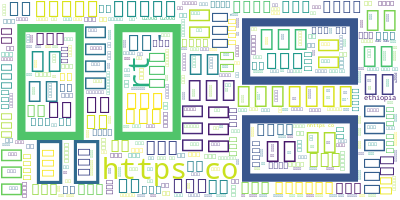

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(df_test["tweet"].values)

text vectorization on amharic dataset

In [ ]:
def run_classifier(files: Tuple[str, str, str],
                   method: str,
                   method_class: Base,
                   model_file: str,
                   lower_case: bool) -> None:
    "Inherit classes from classifiers.py and apply the predict/accuracy methods"
    train, dev, test = files  # Unpack train, dev and test filenames
    result = method_class.predict(train, test, lower_case)
    method_class.accuracy(result)
    # Plot confusion matrix
    make_dirs("Plots")
    fig, ax = plot_confusion_matrix(result['truth'], result['pred'], normalize=True)
    ax.set_title("Normalized Confusion Matrix: {}".format(method.title()))
    fig.tight_layout()
    fig.savefig("Plots/{}.png".format(method))